# Wrangle and Analyze Data

by Fahad Alsaeed

In [1]:
# Import packages and libraries

import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gather the Data

In [2]:
# WeRateDogs Twitter archive: load data

archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Downloaded Image File
    
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [4]:
#Read the dog image prediction .tsv file

dip = pd.read_csv('image-predictions.tsv', sep='\t' )

In [5]:
# Tweet retweet and favorite count: load data using a Twitter API
#Set the keys:

api_key = "vd2cPbaVbFDJZR8XJMbHFiqCs"
api_secret_key = "Y9uwSGKBAo1m1e50uvT7DCbrJviDTJLxBnDlrLWYpEDkjCmVaA"
access_token = "69752191-nxoFisC31nttR31Gl7i9CejRuHLxwFej7UUgLJCWD"
access_token_secret = "YqgkLqqYBXG4jgrBFryg7tAptX7yghaDgWjArIw9AHV1N" 
#Authentication
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [6]:
# Tweest list

tw_list = []

# Exceptions List

ex_list = []

# For loop to add each matched tweet json to tw_list
for tweet_id in archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # How many favorites the tweet had
        retweets = tweet['retweet_count'] # Count of the retweet
        user_followers = tweet['user']['followers_count'] # How many followers the user had
        user_favourites = tweet['user']['favourites_count'] # How many favorites the user had
        date_time = tweet['created_at'] # The date and time of the creation
        
        tw_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        ex_list.append(tweet_id)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 _ [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
812747805718642688 _ [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 _ [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 _ [{'code

In [7]:
# length of the result
print("Number of Results", len(tw_list))

# length of the errors
print("Number of Errors", len(ex_list))

Number of Results 2340
Number of Errors 16


In [8]:
# Create DataFrames from json
json_tweets = pd.DataFrame(tw_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [9]:
# Read the saved tweet_json.txt file into a dataframe
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

## Assess the Data

#### Twitter Archive Data

In [10]:
# random sample data archive

archive.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None
280,839549326359670784,NaN,NaN,2017-03-08 18:52:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He knows he's a little too big f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839549326...,12,10,Winston,None,None,None,None
823,770069151037685760,NaN,NaN,2016-08-29 01:22:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Carbon. This is his first time sw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770069151...,10,10,Carbon,None,None,None,None
1835,676101918813499392,NaN,NaN,2015-12-13 18:10:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Striker. He's ready for Christmas. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676101918...,11,10,Striker,None,None,None,None
896,759099523532779520,NaN,NaN,2016-07-29 18:53:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He has a drinking problem. Inflatab...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759099523...,7,10,Toby,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None
999,748220828303695873,NaN,NaN,2016-06-29 18:25:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Stop what you're doing and watch this heckin m...,NaN,NaN,NaN,https://vine.co/v/iiLjKuYJpr6,13,10,None,None,None,None,None
2120,670411370698022913,NaN,NaN,2015-11-28 01:18:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scooter. He's ready for his first day of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670411370...,12,10,Scooter,None,None,None,None
2123,670385711116361728,NaN,NaN,2015-11-27 23:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He's a Panoramic Benzoate. Can sho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670385711...,8,10,Larry,None,None,None,None
539,806576416489959424,NaN,NaN,2016-12-07 19:09:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hooman catch successful. Massive hit by dog. F...,NaN,NaN,NaN,https://twitter.com/deadspin/status/8065709331...,13,10,None,None,None,None,None


In [11]:
# archive info

archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Dog Image Prediction Files Data

In [12]:
# random dip sample data

dip.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
1799,831670449226514432,https://pbs.twimg.com/media/C4qv3JUW8AADirb.jpg,1,Pembroke,0.624802,True,Cardigan,0.362861,True,Appenzeller,0.003926,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
1366,761672994376806400,https://pbs.twimg.com/ext_tw_video_thumb/76167...,1,gondola,0.318851,False,sea_lion,0.306525,False,pool_table,0.111565,False
290,671166507850801152,https://pbs.twimg.com/media/CVB2TnWUYAA2pAU.jpg,1,refrigerator,0.829772,False,toilet_seat,0.030083,False,shower_curtain,0.015461,False
1376,763183847194451968,https://pbs.twimg.com/media/CpdfpzKWYAAWSUi.jpg,1,miniature_poodle,0.354674,True,toy_poodle,0.338642,True,teddy,0.155828,False
1163,735137028879360001,https://pbs.twimg.com/media/CjO7OfeWgAAUQy-.jpg,1,Walker_hound,0.413535,True,beagle,0.233891,True,English_foxhound,0.164943,True
370,672975131468300288,https://pbs.twimg.com/media/CVbjRSIWsAElw2s.jpg,1,pug,0.836421,True,Brabancon_griffon,0.044668,True,French_bulldog,0.036570,True
1581,796484825502875648,https://pbs.twimg.com/media/Cw2uty8VQAAB0pL.jpg,1,cocker_spaniel,0.116924,True,seat_belt,0.107511,False,Australian_terrier,0.099843,True
1712,818588835076603904,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True


In [13]:
# dip info

dip.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### API Tweet Data

In [14]:
# random tweet_data sample data 

tweet_data.sample(25)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
1984,672488522314567680,1125,449,7769842,141082,2015-12-03 18:52:12
1754,678341075375947776,1792,568,7769814,141082,2015-12-19 22:28:09
1539,688898160958271489,2200,839,7769814,141082,2016-01-18 01:38:15
448,817908911860748288,5131,859,7769771,141082,2017-01-08 01:40:55
1180,717421804990701568,3268,885,7769811,141082,2016-04-05 18:41:02
1415,697575480820686848,2126,528,7769813,141082,2016-02-11 00:18:49
272,839549326359670784,28692,8274,7769768,141082,2017-03-08 18:52:12
702,784057939640352768,31799,12126,7769774,141082,2016-10-06 15:49:14
228,847617282490613760,7229,443,7769768,141082,2017-03-31 01:11:22
2303,666447344410484738,103,20,7769846,141082,2015-11-17 02:46:43


In [15]:
# tweet_data info

tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 6 columns):
tweet_id           2340 non-null int64
favorites          2340 non-null int64
retweets           2340 non-null int64
user_followers     2340 non-null int64
user_favourites    2340 non-null int64
date_time          2340 non-null object
dtypes: int64(5), object(1)
memory usage: 109.8+ KB


## Quality Issues



#### Twitter Archive Dataset

- Remove retweets to keep only original ratings with images.

- Remove superfluous rows and columns.

- Datatype conversion (in_reply_to_status_id - in_reply_to_user_id - retweeted_status_id - retweeted_status_user_id) to string

- The numerator and denominator columns have invalid values.

- Need to Convert Null Values


#### Image Prediction Files Dataset

- Remove duplicates

- Remove superfluous columns

#### API Tweet Data

- Keep the original tweets only


## Tidiness Issues

- The three data sets need to be merged

- Need to melt the doggo, floofer, pupper and puppo twitter archive columns into a single 'stage' column

## Cleaning the Data

In [16]:
# Copy the dataframes 

archive_clean = archive.copy()
dip_clean = dip.copy()
tweet_data_clean = tweet_data.copy()

#### Define 
The three data sets need to be merged

#### Code

In [17]:
# merge dip into ta table

archive_clean = pd.merge(left=archive_clean,
                                 right=tweet_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [18]:
# merge tweet_data into ta table

archive_clean = archive_clean.merge(dip_clean, on='tweet_id', how='inner')


#### Test

In [19]:
# test merge

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 33 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
favorites                     2067 

#### Define

Melt the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column: 'dog_stage'

#### Code

In [20]:
# Select melt and stay columns

MELTS_COLUMNS = ['doggo', 'floofer', 'pupper', 'puppo']
STAY_COLUMNS = [x for x in archive_clean.columns.tolist() if x not in MELTS_COLUMNS]



In [21]:
# Melt the columns

archive_clean = pd.melt(archive_clean, id_vars = STAY_COLUMNS, value_vars = MELTS_COLUMNS, 
                         var_name = 'stages', value_name = 'dog_stage')


In [22]:
# Drop superfluous column

archive_clean = archive_clean.drop('stages', 1)

#### Test

In [23]:
# test

print('Value Counts' + '\n')
print(archive_clean.dog_stage.value_counts())

Value Counts

None       7934
pupper      222
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64


#### Define

Remove superfluous rows and columns

#### Code

In [24]:
# Delete the retweets
archive_clean = archive_clean[pd.isnull(archive_clean.retweeted_status_id)]

# Delete duplicated tweet_id
archive_clean = archive_clean.drop_duplicates()

# Delete tweets with no pictures
archive_clean = archive_clean.dropna(subset = ['jpg_url'])

# Delete columns related to retweet we don't need anymore
archive_clean = archive_clean.drop('retweeted_status_id', 1)
archive_clean = archive_clean.drop('retweeted_status_user_id', 1)
archive_clean = archive_clean.drop('retweeted_status_timestamp', 1)

# Delete column date_time we imported from the API, it has the same values as timestamp column
archive_clean = archive_clean.drop('date_time', 1)

# Convert timestamp to datetime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

# Extract year, month and day to new columns
archive_clean['year'] = archive_clean['timestamp'].dt.year
archive_clean['month'] = archive_clean['timestamp'].dt.month
archive_clean['day'] = archive_clean['timestamp'].dt.day

# Finally drop timestamp column
archive_clean = archive_clean.drop('timestamp', 1)


#### Test

In [25]:
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage',
 'year',
 'month',
 'day']

#### Define

Correct Numerators

#### Code

In [26]:

# Correct

archive_clean[['rating_numerator', 'rating_denominator']] = archive_clean[['rating_numerator','rating_denominator']].astype(float)

archive_clean.info()

#First change numerator and denominators type int to float to allow decimals 
archive_clean[['rating_numerator', 'rating_denominator']] = archive_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators

archive_clean.loc[(archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
archive_clean.loc[(archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
archive_clean.loc[(archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
archive_clean.loc[(archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
archive_clean.loc[(archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2309 entries, 0 to 7085
Data columns (total 28 columns):
tweet_id                 2309 non-null int64
in_reply_to_status_id    27 non-null float64
in_reply_to_user_id      27 non-null float64
source                   2309 non-null object
text                     2309 non-null object
expanded_urls            2309 non-null object
rating_numerator         2309 non-null float64
rating_denominator       2309 non-null float64
name                     2309 non-null object
favorites                2309 non-null int64
retweets                 2309 non-null int64
user_followers           2309 non-null int64
user_favourites          2309 non-null int64
jpg_url                  2309 non-null object
img_num                  2309 non-null int64
p1                       2309 non-null object
p1_conf                  2309 non-null float64
p1_dog                   2309 non-null bool
p2                       2309 non-null object
p2_conf                  2

#### Test

In [27]:
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
40,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
553,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
609,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1446,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
4743,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


#### Define 

Correct Denominators

In [28]:
# Update both numerators and denominators: 

# Tweets with denominator not equal to 10 
archive_clean.loc[(archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
archive_clean.loc[(archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
archive_clean.loc[(archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
archive_clean.loc[(archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
archive_clean.loc[(archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
archive_clean.loc[(archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

# Tweets with no actual ratings
archive_clean = archive_clean[archive_clean['tweet_id'] != 832088576586297345]
archive_clean = archive_clean[archive_clean['tweet_id'] != 810984652412424192]
archive_clean = archive_clean[archive_clean['tweet_id'] != 682808988178739200]
archive_clean = archive_clean[archive_clean['tweet_id'] != 835246439529840640]
archive_clean = archive_clean[archive_clean['tweet_id'] != 686035780142297088]



#### Test

In [29]:
# Only the group dogs cleaned
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['rating_denominator'] != 10][['tweet_id',
                                                            'text',
                                                            'rating_numerator',
                                                            'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
341,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
730,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
919,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1017,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1042,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1060,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1126,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1202,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
1374,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
1375,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0


#### Define

Create New Rating Column

#### Code

In [30]:
# Create a new column with rating in float type to avoid converting all int column to float
archive_clean['rating'] = 10 * archive_clean['rating_numerator'] / archive_clean['rating_denominator'].astype(float)


#### Test

In [31]:

archive_clean.sample(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,year,month,day,rating
5004,740676976021798912,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","Meet Baloo. He's expecting a fast ground ball,...",https://twitter.com/dog_rates/status/740676976...,11.0,10.0,Baloo,18932,...,0.275225,True,Siamese_cat,0.043559,False,pupper,2016,6,8,11.0
78,874296783580663808,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,https://twitter.com/dog_rates/status/874296783...,13.0,10.0,Jed,25559,...,0.277191,True,toy_poodle,0.157402,True,None,2017,6,12,13.0
177,849776966551130114,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys? Again? We only rate dogs. Plea...,https://twitter.com/dog_rates/status/849776966...,12.0,10.0,None,31306,...,0.136852,True,bonnet,0.103111,False,None,2017,4,6,12.0
866,741067306818797568,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12.0,10.0,just,9860,...,0.052956,True,kelpie,0.035711,True,doggo,2016,6,10,12.0
1605,674800520222154752,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedders. He broke his leg saving babie...,https://twitter.com/dog_rates/status/674800520...,11.0,10.0,Tedders,3066,...,0.096911,True,dingo,0.009196,False,None,2015,12,10,11.0


#### Define

Drop duped jpg_url

#### Code

In [32]:
#CODE: Delete duplicated jpg_url
archive_clean = archive_clean.drop_duplicates(subset=['jpg_url'], keep='last')


#### Test

In [33]:
sum(archive_clean['jpg_url'].duplicated())

0

#### Define

Create column for the image prediction and column for the confidence level

#### Code

In [34]:
# The first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

# Create a function with nested if to capture the dog type and confidence level
# From the first 'true' prediction
def image(archive_clean):
    if archive_clean['p1_dog'] == True:
        dog_type.append(archive_clean['p1'])
        confidence_list.append(archive_clean['p1_conf'])
    elif archive_clean['p2_dog'] == True:
        dog_type.append(archive_clean['p2'])
        confidence_list.append(archive_clean['p2_conf'])
    elif archive_clean['p3_dog'] == True:
        dog_type.append(archive_clean['p3'])
        confidence_list.append(archive_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

# Series objects having index the image_prediction_clean column.        
archive_clean.apply(image, axis=1)

# Create new columns
archive_clean['dog_type'] = dog_type
archive_clean['confidence_list'] = confidence_list

# Drop rows that have prediction_list 'error'
archive_clean = archive_clean[archive_clean['dog_type'] != 'Error']


#### Test

In [35]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683 entries, 1 to 7085
Data columns (total 31 columns):
tweet_id                 1683 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
source                   1683 non-null object
text                     1683 non-null object
expanded_urls            1683 non-null object
rating_numerator         1683 non-null float64
rating_denominator       1683 non-null float64
name                     1683 non-null object
favorites                1683 non-null int64
retweets                 1683 non-null int64
user_followers           1683 non-null int64
user_favourites          1683 non-null int64
jpg_url                  1683 non-null object
img_num                  1683 non-null int64
p1                       1683 non-null object
p1_conf                  1683 non-null float64
p1_dog                   1683 non-null bool
p2                       1683 non-null object
p2_conf                  1

#### Define 

Delete superfuous image columns


#### Code

In [36]:
# Delete columns

archive_clean = archive_clean.drop(['img_num', 'p1', 'in_reply_to_status_id',
                         'in_reply_to_user_id', 'expanded_urls',
                            'p1_conf', 'p1_dog', 
                            'p2', 'p2_conf', 
                            'p2_dog', 'p3', 
                            'p3_conf', 
                            'p3_dog'], 1)

#### Test

In [37]:
list(archive_clean)

['tweet_id',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'dog_stage',
 'year',
 'month',
 'day',
 'rating',
 'dog_type',
 'confidence_list']

#### Define

Change tweet_id from str to int

#### Code

In [38]:
# Change tweet_id from str to int
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(int)


#### Test

In [39]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683 entries, 1 to 7085
Data columns (total 18 columns):
tweet_id              1683 non-null int64
source                1683 non-null object
text                  1683 non-null object
rating_numerator      1683 non-null float64
rating_denominator    1683 non-null float64
name                  1683 non-null object
favorites             1683 non-null int64
retweets              1683 non-null int64
user_followers        1683 non-null int64
user_favourites       1683 non-null int64
jpg_url               1683 non-null object
dog_stage             1683 non-null object
year                  1683 non-null int64
month                 1683 non-null int64
day                   1683 non-null int64
rating                1683 non-null float64
dog_type              1683 non-null object
confidence_list       1683 non-null object
dtypes: float64(3), int64(8), object(7)
memory usage: 249.8+ KB


## Store, Analyze, and Visualize Master Data

In [40]:
#Store the clean DataFrame in a CSV file
archive_clean.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [41]:
# There is a strong relationship between retweets and favorite counts (0.93). 
# As a tweet gains Favorites, one can expect to see retweets to increase and vice versa.

archive_clean.corr()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,user_followers,user_favourites,year,month,day,rating
tweet_id,1.000000,0.093698,-0.030030,0.600701,0.374413,-0.317977,0.023126,0.879381,-0.284839,-0.009679,0.543096
rating_numerator,0.093698,1.000000,0.972494,0.064033,0.049640,-0.038463,-0.001071,0.110515,-0.083318,-0.006058,0.236434
rating_denominator,-0.030030,0.972494,1.000000,-0.029111,-0.020822,-0.001443,-0.008354,-0.002658,-0.039875,0.005061,0.009506
favorites,0.600701,0.064033,-0.029111,1.000000,0.931396,-0.200685,-0.005178,0.515775,-0.144325,-0.021099,0.407274
retweets,0.374413,0.049640,-0.020822,0.931396,1.000000,-0.138442,-0.010884,0.317409,-0.080050,-0.038263,0.308235
user_followers,-0.317977,-0.038463,-0.001443,-0.200685,-0.138442,1.000000,0.928522,-0.308707,0.150119,-0.005233,-0.163522
user_favourites,0.023126,-0.001071,-0.008354,-0.005178,-0.010884,0.928522,1.000000,0.010846,0.012929,-0.009301,0.031067
year,0.879381,0.110515,-0.002658,0.515775,0.317409,-0.308707,0.010846,1.000000,-0.705655,-0.089522,0.503720
month,-0.284839,-0.083318,-0.039875,-0.144325,-0.080050,0.150119,0.012929,-0.705655,1.000000,0.096560,-0.204578
day,-0.009679,-0.006058,0.005061,-0.021099,-0.038263,-0.005233,-0.009301,-0.089522,0.096560,1.000000,-0.050957


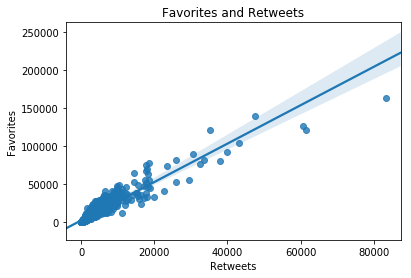

In [42]:
g = sns.regplot(x=archive_clean.retweets, y=archive_clean.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()
fig = g.get_figure()
fig.savefig('plot_01.png')

In [43]:
archive_clean['dog_type'].value_counts()

golden_retriever                  157
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
Pomeranian                         42
Samoyed                            41
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
Staffordshire_bullterrier          21
German_shepherd                    21
Cardigan                           21
Siberian_husky                     20
Shih-Tzu                           20
beagle                             20
Rottweiler                         19
Shetland_sheepdog                  19
Maltese_dog                        19
kuvasz                             18
Lakeland_terrier                   18
Italian_grey

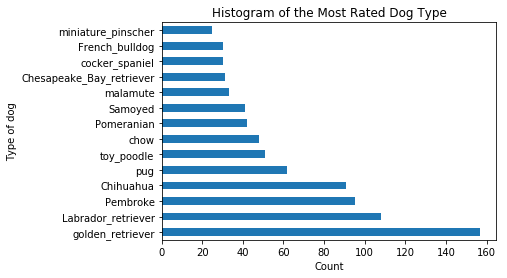

In [44]:
df_dog_type = archive_clean.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('plot_02.png',bbox_inches='tight');

In [45]:
df_dog_type_mean = archive_clean.groupby('dog_type').mean()
df_dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,user_followers,user_favourites,year,month,day,rating
dog_type,,,,,,,,,,,
Afghan_hound,8.041621e+17,9.666667,10.0,16484.666667,5608.666667,7.769772e+06,141082.0,2016.333333,7.666667,11.000000,9.666667
Airedale,7.184489e+17,9.833333,10.0,5037.750000,1306.333333,7.769813e+06,141082.0,2015.583333,8.750000,15.916667,9.833333
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,8949.937500,2168.750000,7.769795e+06,141082.0,2016.187500,5.250000,15.000000,10.312500
Appenzeller,7.939334e+17,11.000000,10.0,7007.000000,1358.000000,7.769790e+06,141082.0,2016.500000,4.500000,18.500000,11.000000
Australian_terrier,7.785921e+17,11.500000,10.0,10639.500000,2893.500000,7.769790e+06,141082.0,2016.500000,3.500000,7.000000,11.500000


In [46]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

dog_type
Japanese_spaniel                5.000000
soft-coated_wheaten_terrier     8.800000
Scotch_terrier                  9.000000
Walker_hound                    9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.333333
Boston_bull                     9.416667
Welsh_springer_spaniel          9.500000
Dandie_Dinmont                  9.571429
miniature_schnauzer             9.600000
Norwich_terrier                 9.600000
redbone                         9.666667
Afghan_hound                    9.666667
Maltese_dog                     9.736842
Rhodesian_ridgeback             9.750000
Scottish_deerhound              9.750000
Airedale                        9.833333
Mexican_hairless                9.857143
Newfoundland                    9.857143
Saint_Bernard                   9.857143
English_setter                  9.875000
miniature_poodle                9.875000
Brabancon_griffon              10.000000
groenendael                    10.000000
Italian

In [47]:
df_dog_type_count = archive_clean.groupby('dog_type').count()
df_dog_type_count

,tweet_id,source,text,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,user_favourites,jpg_url,dog_stage,year,month,day,rating,confidence_list
dog_type,,,,,,,,,,,,,,,,,
Afghan_hound,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Airedale,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Bedlington_terrier,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Bernese_mountain_dog,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Blenheim_spaniel,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Border_collie,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [48]:
dog_type_count = df_dog_type_count['rating']
dog_type_mean = df_dog_type_mean['rating']
dog_type_mean

dog_type
Afghan_hound                       9.666667
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
Bedlington_terrier                10.333333
Bernese_mountain_dog              11.272727
Blenheim_spaniel                  11.100000
Border_collie                     10.583333
Border_terrier                    12.142857
Boston_bull                        9.416667
Bouvier_des_Flandres              13.000000
Brabancon_griffon                 10.000000
Brittany_spaniel                  10.375000
Cardigan                          11.142857
Chesapeake_Bay_retriever          10.838710
Chihuahua                         10.549451
Dandie_Dinmont                     9.571429
Doberman                          11.333333
English_setter                     9.875000
English_springer                  10.500000
EntleBucher                       11.000000
Eskimo_dog             

In [49]:
df = pd.DataFrame()
df['dog_type_count'] = dog_type_count
df['dog_type_mean'] = dog_type_mean
df

,dog_type_count,dog_type_mean
dog_type,,
Afghan_hound,3,9.666667
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
Bedlington_terrier,6,10.333333
Bernese_mountain_dog,11,11.272727
Blenheim_spaniel,10,11.100000
Border_collie,12,10.583333


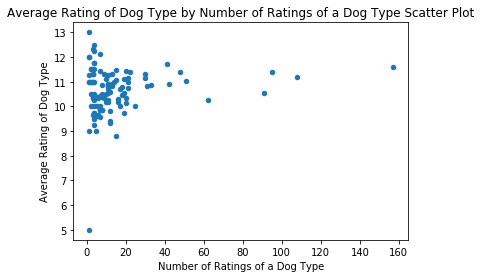

In [50]:
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('plot_03.png',bbox_inches='tight');

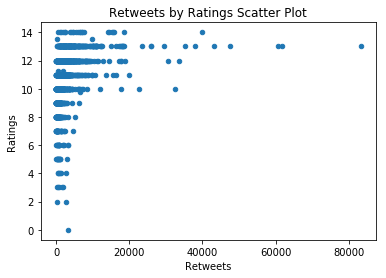

In [51]:
archive_clean.plot(x='retweets', y='rating', kind='scatter')
plt.xlabel('Retweets')
plt.ylabel('Ratings')
plt.title('Retweets by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('plot_04.png',bbox_inches='tight');